In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from utils.blockInfluence import training, prediction,localization_on_image


# Etude des blocs avec les meilleures scores de prédiction

In [2]:
INPUT_DATA_FOLDER = "../output/datasets/"
DATASETS = [13,14,15]
DATA_FOLDER = "../data/"

In [22]:
# Créer et entraîner le modèle
model = RandomForestClassifier(max_depth=10, criterion='entropy', random_state=0)
model, df_train, df_test = training(model, INPUT_DATA_FOLDER, DATASETS)

# résultats de prédiction sur le test set
my_test = prediction(model, df_test, DATASETS)

KeyboardInterrupt: 

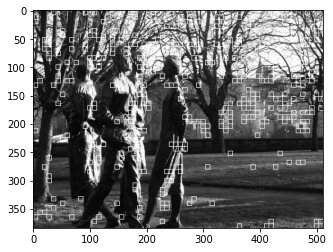

In [42]:
# visualiser sur l'image les blocs de score supérieur à 90% des scores
img_numbers = my_test['image_number'].unique()
img_number = img_numbers[0] # numéro de l'image dans le test set : 1=l'image d'indice 1 dans l'ensemble du tests set
dataset_nb = DATASETS[2] # le numéro du dataset dans le quel on souahite récupérer cette image

s90= my_test[my_test['class']==dataset_nb].pred_proba.quantile([0.9]).values[0] # le score de prédicition en-dessous duquel se trouve 90% des blocs
img_res, bl_pred, vis = localization_on_image(DATA_FOLDER, img_number, dataset_nb, my_test, s90)
img_res = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)
plt.imshow(img_res)
plt.imsave('../output/img_with_rec.png', img_res)

## Histogrammes des blocs avec les meilleures scores de prédictions

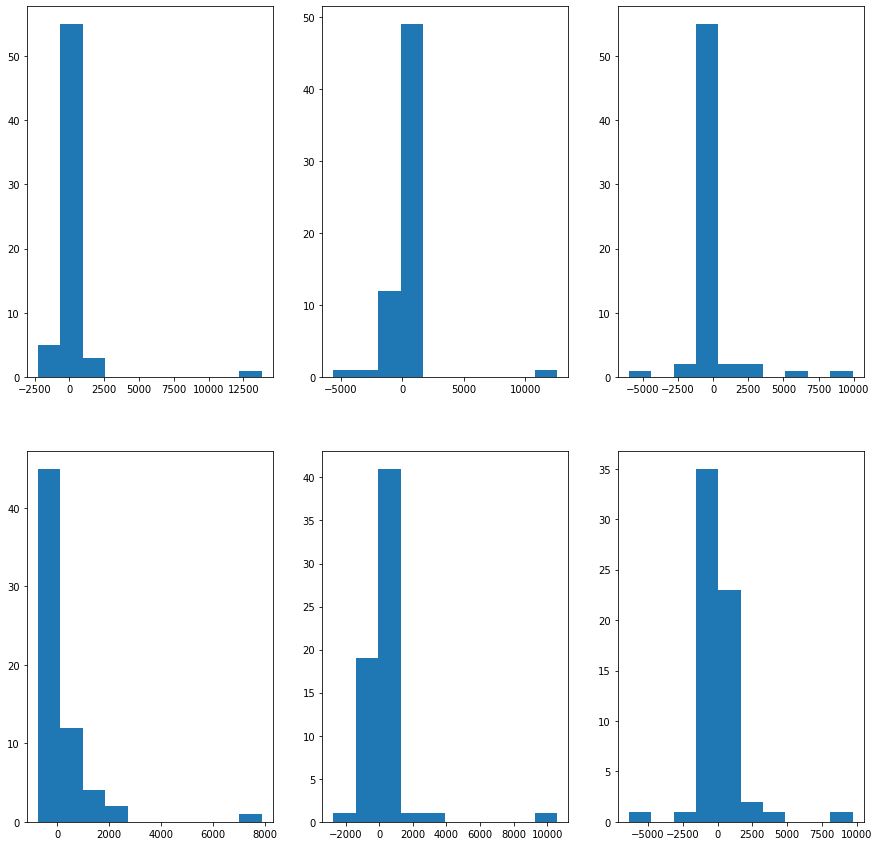

In [40]:
plt.figure(figsize=(15,15))
i = 1
for bloc_dct in bl_pred[bl_pred['pred_proba']>=s90]['dct'][:6]:
    plt.subplot(2,3,i)
    i = i+1
    plt.hist(bloc_dct)
plt.savefig("../output/hist_s90.png")

## Histogrammes des blocs avec les scores de prédictions les moins bonnes

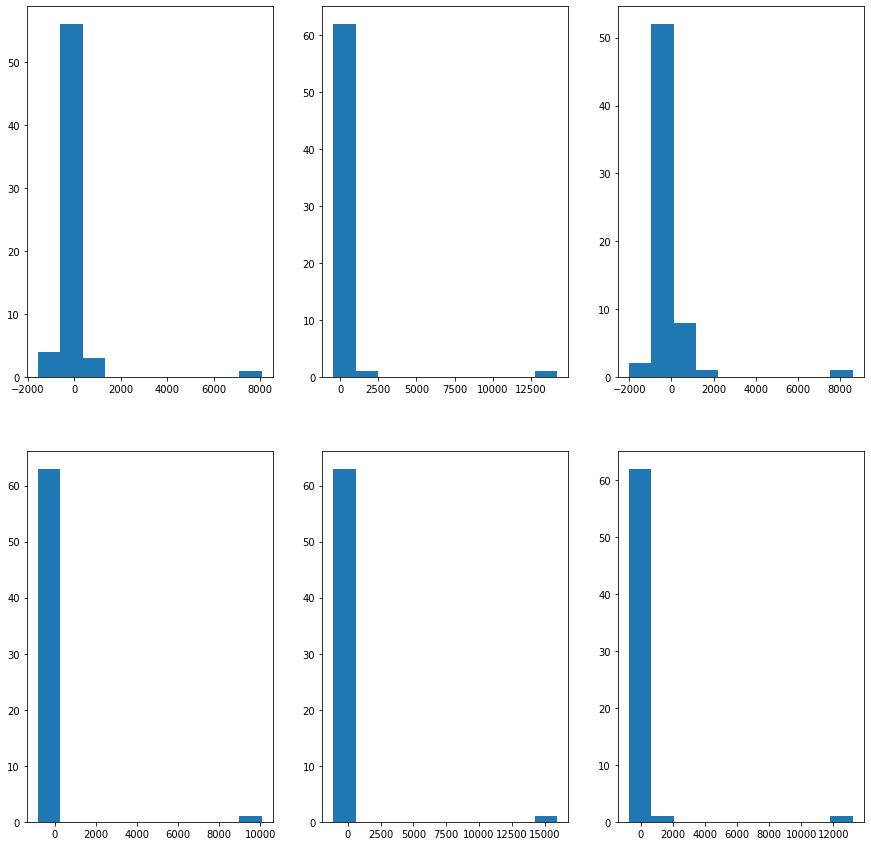

In [37]:
s10 = my_test[my_test['class']==dataset_nb].pred_proba.quantile([0.1]).values[0]
plt.figure(figsize=(15,15))
i = 1
for bloc_dct in bl_pred[bl_pred['pred_proba']<=s10]['dct'][:6]:
    plt.subplot(2,3,i)
    i = i+1
    plt.hist(bloc_dct)
plt.savefig("../output/hist_s10.png")